<a href="https://colab.research.google.com/github/schipagi/Mastering-Blockchain-Programming-with-Solidity/blob/master/BBC_classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Progetto svolto da **Giuseppe Schipani**

**Classificazione di articoli della BBC di notizie su Cina e India**

**Descrizione del progetto**\
In questo progetto, l'obiettivo principale è stato quello di classificare automaticamente gli articoli di notizie in base al loro contenuto, concentrandosi su due categorie: Cina e India.


**Raccolta dei dati**\
Il primo passo è stato quello di raccogliere un ampio set di articoli di notizie dalla cronologia di notizie della BBC usando wayback machine.\
Per fare ciò, è stato utilizzato lo scraping web per estrarre il testo degli articoli dalle pagine web archiviate. A causa delle differenze nei tag HTML, sono state utilizzate inizialmente due funzioni di estrazione del testo per adattarsi ai diversi formati. In seguito queste due funzioni sono state unite in modo da avere una singola funzione.

**Preparazione dei dati**\
Una volta raccolti gli articoli, i dati sono stati suddivisi in tre set: training set (60%), validation set (20%)  e test set (20%). Questi dati sono stati salvati in file pkl e in seguito sono stati utilizzati per addestrare e valutare il modello di classificazione.

**Creazione del modelli**\
Il progetto ha implementato e confrontato quattro diversi metodi di classificazione:

1) Baseline: conteggio delle parole chiave (Cina e India) in ciascun articolo per determinare la categoria.Questo modello è il punto base di partenza.\
2) Logistic Regression\
3) MultinomialNB: utilizzo di un classificatore Naïve Bayes Multinomiale basato su conteggio parole.\
4) BERT completo: addestramento di un modello BERT pre-addestrato per la classificazione degli articoli.

**Valutazione dei modelli**\
Ogni modello è stato valutato utilizzando metriche come precision, recall, f1-score e accuracy sul test set. I risultati ottenuti sono stati confrontati per determinare il metodo migliore per la classificazione degli articoli di notizie. Il metodo migliore, che ha ottenuto risultati perfetti è stato Bert, ma non di molto, perchè anche MultinomialNB ha avuto risultati perfetti (1 solo errore).

**Conclusione**\
Questo progetto ha dimostrato l'efficacia dei moderni metodi di apprendimento automatico e del deep learning, come BERT, nella classificazione di testi. L'analisi dei risultati ottenuti può aiutare a identificare le aree di miglioramento e a guidare futuri sviluppi in questo campo.

In [ ]:
# Importo i files pickel e definisco la funzione per aprire un file
import pickle
def load (file):
  return pickle.load( open(file, "rb" ) )

In [ ]:
# importo google drive e monto la memoria
from google.colab import drive
drive.mount('/content/drive')

# carico i dati dai files che ho creato da un altro notebook e salvato nel drive
training_set = load("/content/drive/My Drive/pkl BBC/training_set2.pkl")
validation_set = load("/content/drive/My Drive/pkl BBC/validation_set2.pkl")
test_set = load("/content/drive/My Drive/pkl BBC/test_set2.pkl")

Mounted at /content/drive


In [ ]:
validation_set.tail 

<bound method NDFrame.tail of                                                   text  label
0    Deepika Padukone: Has Bollywood found a politi...  india
1    Does JNU campus attack mean India is failing i...  india
2    Kunal Kamra: Airline ban on India comedian spa...  india
3    Delhi election: Arvind Kejriwal and AAP surge ...  india
4    An 'unhappy marriage' that has saved thousands...  india
..                                                 ...    ...
303  Coronavirus: New China figures highlight toll ...  china
304  Coronavirus: Can people recover? And other que...  china
305  New China virus: Your questions answered. Over...  china
306  Coronavirus: Largest study suggests elderly an...  china
307  Coronavirus Wuhan diary: 'He got a hospital be...  china

[308 rows x 2 columns]>

In [ ]:
!pip install datasets
from datasets import Dataset

# Converto il dataframe in un oggetto Dataset
training_set = Dataset.from_pandas(training_set)
validation_set = Dataset.from_pandas(validation_set)
test_set = Dataset.from_pandas(test_set)

training_set
training_set[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.6 MB/s eta 0:00:00


{'text': 'India election 2019: The mystery of 21 million \'missing\' women voters. Indian women got the right to vote the year their country was born. It was, as a historian said, a "staggering achievement for a post-colonial nation". But more than 70 years later, why are 21 million women in India apparently being denied the right to vote?It is one of India\'s many social riddles.Women have been enthusiastic voters in India: voter turnout among women will be higher in this year\'s general election than that of men. Most women say they are voting independently, without consulting their spouses and families.To make them secure, there are separate queues for women at polling stations and female police officers guarding them. Polling stations contain at least one female officer.More than 660 women candidates contested the 2014 elections, up from 24 in the first election in 1951. And political parties now target women as a separate constituency, offering them cheap cooking gas, scholarships

In [ ]:
# Estraggo i dati di testo e le etichette dai dataset

training_data = [item['text'] for item in training_set]
training_labels = [item['label'] for item in training_set]

validation_data = [item['text'] for item in validation_set]
validation_labels = [item['label'] for item in validation_set]

test_data = [item['text'] for item in test_set]
test_labels = [item['label'] for item in test_set]

Baseline model:

In [ ]:
!pip install sklearn
!pip install nltk

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report

baseLinePrediction = []

# per ciascun articolo del test set, suddivide il testo in token utilizzando la funzione word_tokenize
for x in list(test_set['text']):
    tokens = word_tokenize(x)
    china = sum([1 for token in tokens if token.lower() == 'china'])
    india = sum([1 for token in tokens if token.lower() == 'india'])

    if india > china:
       baseLinePrediction.append('india')
    else:
       baseLinePrediction.append('china')

target_names = ['china', 'india']
print(classification_report(test_labels, baseLinePrediction, target_names=target_names))

# Come si puo notare, già la baseline ha un ottimo risultato!!!! Ma cerchiamo di vedere se altri classificatori portano a risultati migliori...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


              precision    recall  f1-score   support

       china       0.92      1.00      0.96       122
       india       1.00      0.96      0.98       267

    accuracy                           0.97       389
   macro avg       0.96      0.98      0.97       389
weighted avg       0.98      0.97      0.97       389



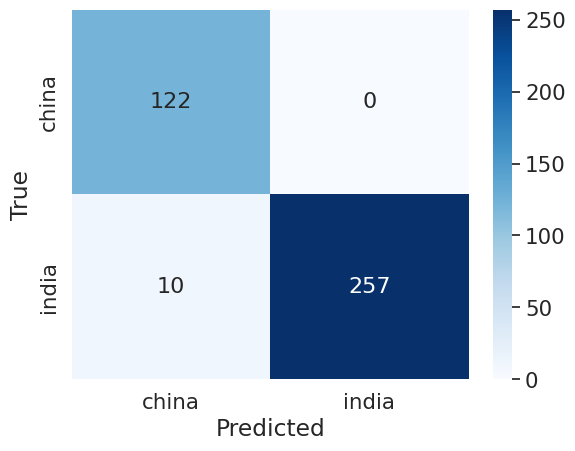

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice di confusione
cm = confusion_matrix(test_labels, baseLinePrediction)

# Plot della matrice di confusione
sns.set(font_scale=1.4) # Imposta la scala del font per renderlo più leggibile
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

LOGISTIC REGRESSION:

In [ ]:
# Conversione dei testi in features (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
training_features = vectorizer.fit_transform(training_data)
test_features = vectorizer.transform(test_data)

Logistic Regression:

In [ ]:
# Training
classifier = LogisticRegression()
classifier.fit(training_features, training_labels)

# Test
predictions = classifier.predict(test_features)

target_names = ['china', 'india']
print(classification_report(test_labels, predictions, labels = ["china", "india"], target_names=target_names))

# in qesto caso (abbastanza particolare) possiamo osservare che Logistic Regression funziona peggio di baseline

              precision    recall  f1-score   support

       china       1.00      0.77      0.87       122
       india       0.91      1.00      0.95       267

    accuracy                           0.93       389
   macro avg       0.95      0.89      0.91       389
weighted avg       0.93      0.93      0.93       389



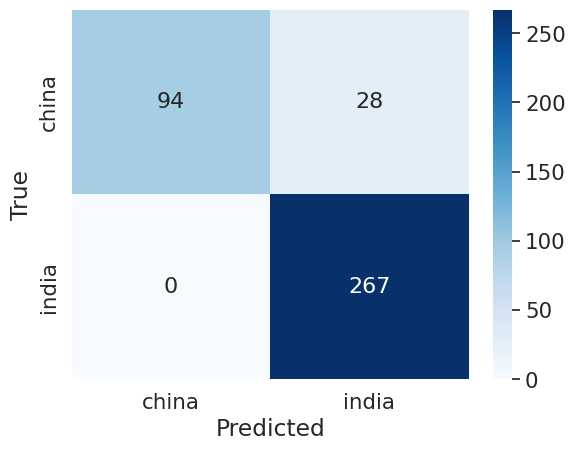

In [ ]:
# Matrice di confusione
cm = confusion_matrix(test_labels, predictions)

# Plot della matrice di confusione
sns.set(font_scale=1.4) # Imposta la scala del font per renderlo più leggibile
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression classifier con normalizzazione dei dati:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Normalizzazione dei dati (MaxAbsScalar)
# Classificatore di Regressione Logistica (LogisticRegression())
pipeline = make_pipeline(MaxAbsScaler(), LogisticRegression())

# Training
pipeline.fit(training_features, training_labels)

# Test
predictions = pipeline.predict(test_features)

target_names = ['china', 'india']
print(classification_report(test_labels, predictions, target_names=target_names))

# Ho provato a vedere se con una normalizzazione il risulato sarebbe cambiato, ma il risultato è identico  

              precision    recall  f1-score   support

       china       1.00      0.77      0.87       122
       india       0.91      1.00      0.95       267

    accuracy                           0.93       389
   macro avg       0.95      0.89      0.91       389
weighted avg       0.93      0.93      0.93       389



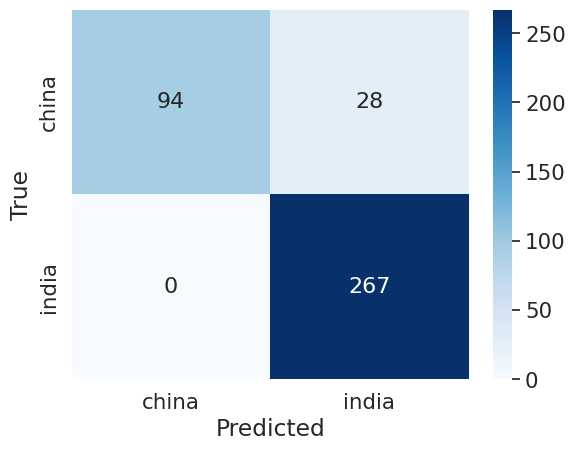

In [ ]:
# Matrice di confusione
cm = confusion_matrix(test_labels, predictions)

# Plot della matrice di confusione
sns.set(font_scale=1.4) # Imposta la scala del font per renderlo più leggibile
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

MultinomialNB (Naive Bayes) classifier:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Conversione dei testi in features (conteggio parole)
vectorizer = CountVectorizer()
training_features = vectorizer.fit_transform(training_data)
test_features = vectorizer.transform(test_data)

# Training
classifier = MultinomialNB()
classifier.fit(training_features, training_labels)

# Test
predictions = classifier.predict(test_features)

target_names = ['china', 'india']
print(classification_report(test_labels, predictions, target_names=target_names))


# Cerchiamo di identificare quali sono gli articoli non classificati correttamente
mismatch_index = -1
for i, (true_label, predicted_label) in enumerate(zip(test_labels, predictions)):
    if true_label != predicted_label:
        mismatch_index = i
        break

if mismatch_index != -1:
    print("Indice dell'articolo non correttamente classificato:", mismatch_index)
    print("Etichetta reale:", test_labels[mismatch_index])
    print("Etichetta prevista:", predictions[mismatch_index])
    print("\nTesto dell'articolo:")
    print(test_data[mismatch_index])
else:
    print("Tutti gli articoli sono stati classificati correttamente.")

# Finalmente ho ottenuto un risultato pressochè perfetto, ho estrapolato l'unico articolo che non è roiscoto ad identificare

              precision    recall  f1-score   support

       china       1.00      0.99      1.00       122
       india       1.00      1.00      1.00       267

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389

Indice dell'articolo non correttamente classificato: 318
Etichetta reale: china
Etichetta prevista: india

Testo dell'articolo:
Coronavirus: China's plan to test everyone in Wuhan. China has completed a mass testing programme in Wuhan, the city where the Covid-19 pandemic began.The authorities had pledged to test the entire city over a 10-day period after a cluster of new infections arose.We've looked at the original plan, and what was achieved.Wuhan has an estimated population of 11 million people, so aiming to test everyone in 10 days would have been an ambitious target.But those already tested in the seven days prior to mass testing starting, as well as any chil

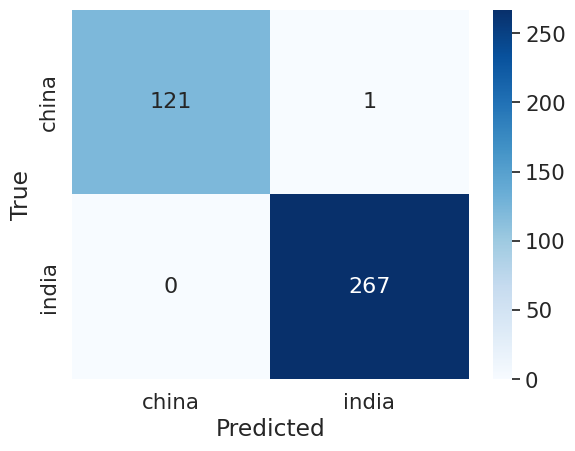

In [ ]:
# Matrice di confusione
cm = confusion_matrix(test_labels, predictions)

# Plot della matrice di confusione
sns.set(font_scale=1.4) # Imposta la scala del font per renderlo più leggibile
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Bert completo:

In [ ]:
# !!!! L'ESECUZIONE RICHIEDE MOLTO TEMPO !!!!
!pip install transformers

import tensorflow as tf
import numpy as np
from transformers import AutoTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Tokenizzo i dati diminuendo la lunghezza del testo (aumento la velocità di esecuzione a caspito della precisione)
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
train_encodings = tokenizer(training_data, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(validation_data, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_data, truncation=True, padding=True, max_length=512)

# Converto le label in interi
le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
validation_labels = le.transform(validation_labels)
test_labels = le.transform(test_labels)

num_classes = len(np.unique(training_labels))  # Calcola il numero di classi univoche

# Definisco il modello Bert non case sensitive
input_layer = tf.keras.layers.Input(shape=(512,), dtype=tf.int32)
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
outputs = bert_model(input_layer).logits
model = tf.keras.Model(inputs=input_layer, outputs=outputs)

# Compilo il modello
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Addestro il modello
model.fit(
    np.array(train_encodings['input_ids']), np.array(training_labels),
    validation_data=(np.array(val_encodings['input_ids']), np.array(validation_labels)),
    epochs=3, batch_size=8
)

# Valuto il modello sul test set
_, test_acc = model.evaluate(np.array(test_encodings['input_ids']), np.array(test_labels), verbose=0)
print(f'Test accuracy: {100 * test_acc:.2f}%')

# Faccio le predizioni sul test set
predictions = np.argmax(model.predict(np.array(test_encodings['input_ids'])), axis=1)

# Converto le predizioni e le etichett in liste per evitare l'errore
predictions_list = predictions.tolist()
test_labels_list = test_labels.tolist()

target_names = le.classes_
print(classification_report(test_labels_list, predictions_list, target_names=target_names))


# Possiamo notare che con Bert l'accuratezza è perfetta. Questo classificatore è il vincitore!!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
197/197 [==============================] - 273s 1s/step - loss: 0.3380 - accuracy: 0.8682 - val_loss: 0.2623 - val_accuracy: 0.9318
Epoch 2/3
197/197 [==============================] - 211s 1s/step - loss: 0.0489 - accuracy: 0.9809 - val_loss: 0.0957 - val_accuracy: 0.9740
Epoch 3/3
197/197 [==============================] - 215s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1403 - val_accuracy: 0.9740
Test accuracy: 100.00%
13/13 [==============================] - 19s 1s/step
              precision    recall  f1-score   support

       china       1.00      1.00      1.00       122
       india       1.00      1.00      1.00       267

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



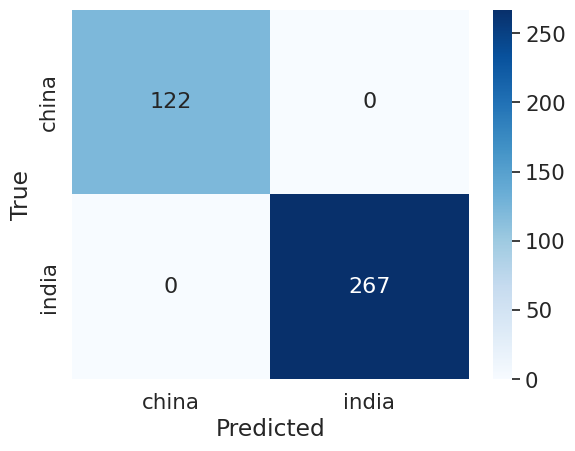

In [ ]:
# Matrice di confusione
cm = confusion_matrix(test_labels, predictions)

# Plot della matrice di confusione
sns.set(font_scale=1.4) # Imposta la scala del font per renderlo più leggibile
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()